<a href="https://colab.research.google.com/github/SoumyaMajumder90/Data-Analysis/blob/main/DSAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv("insurance.csv")  # Replace with your file path

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


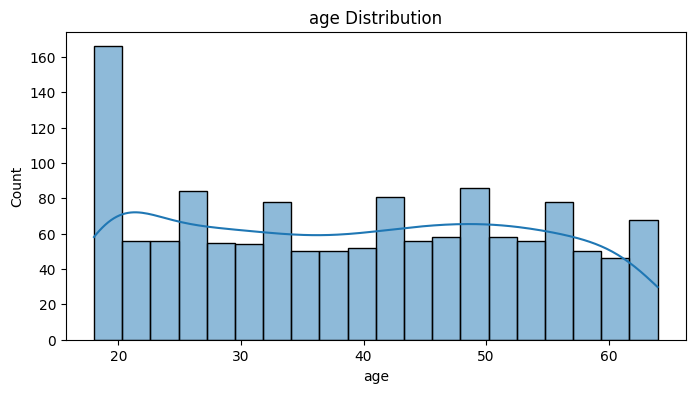

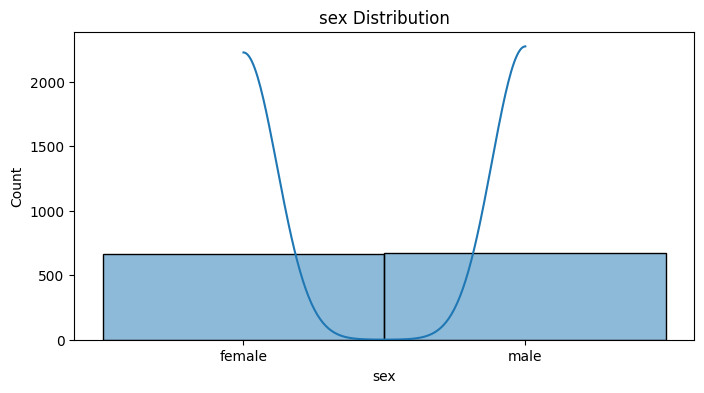

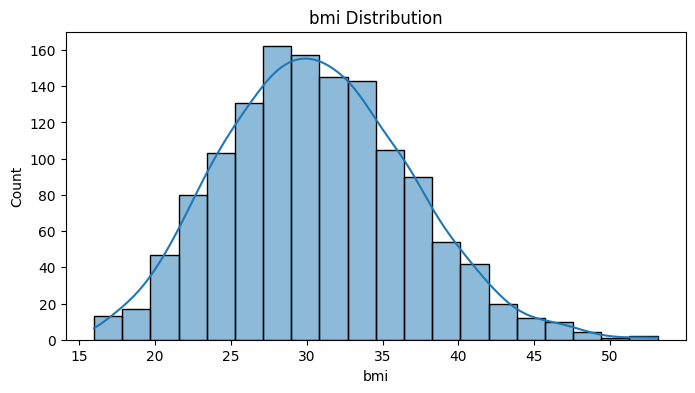

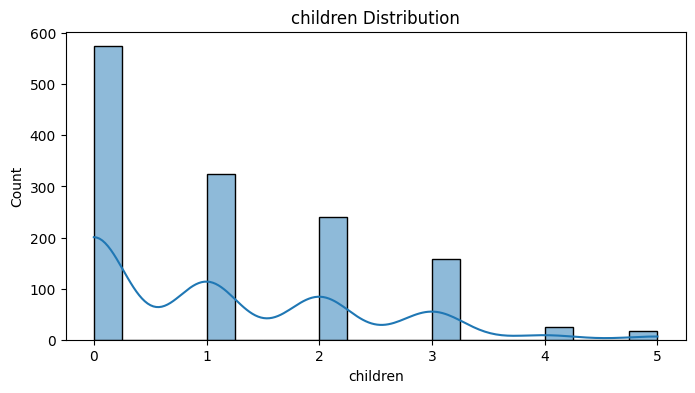

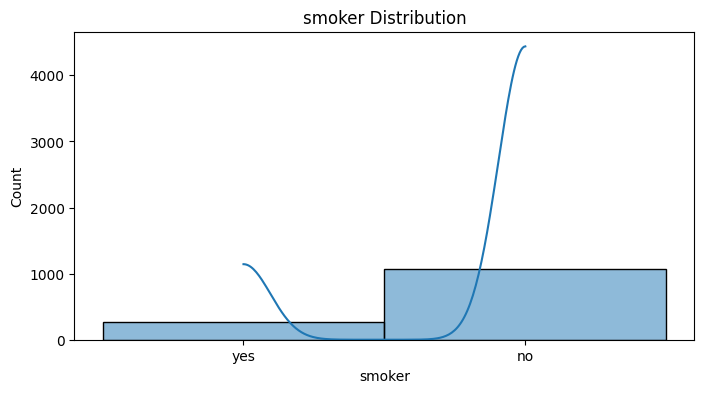

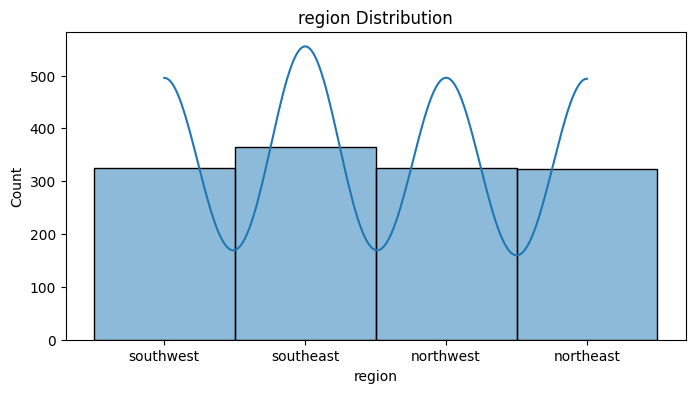

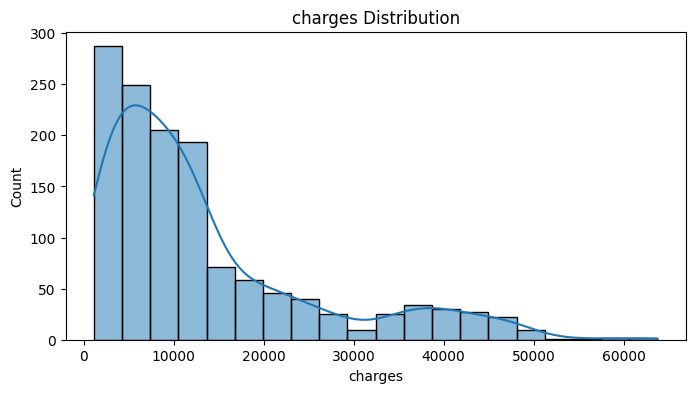

In [ ]:
for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'{column} Distribution')
    plt.show()

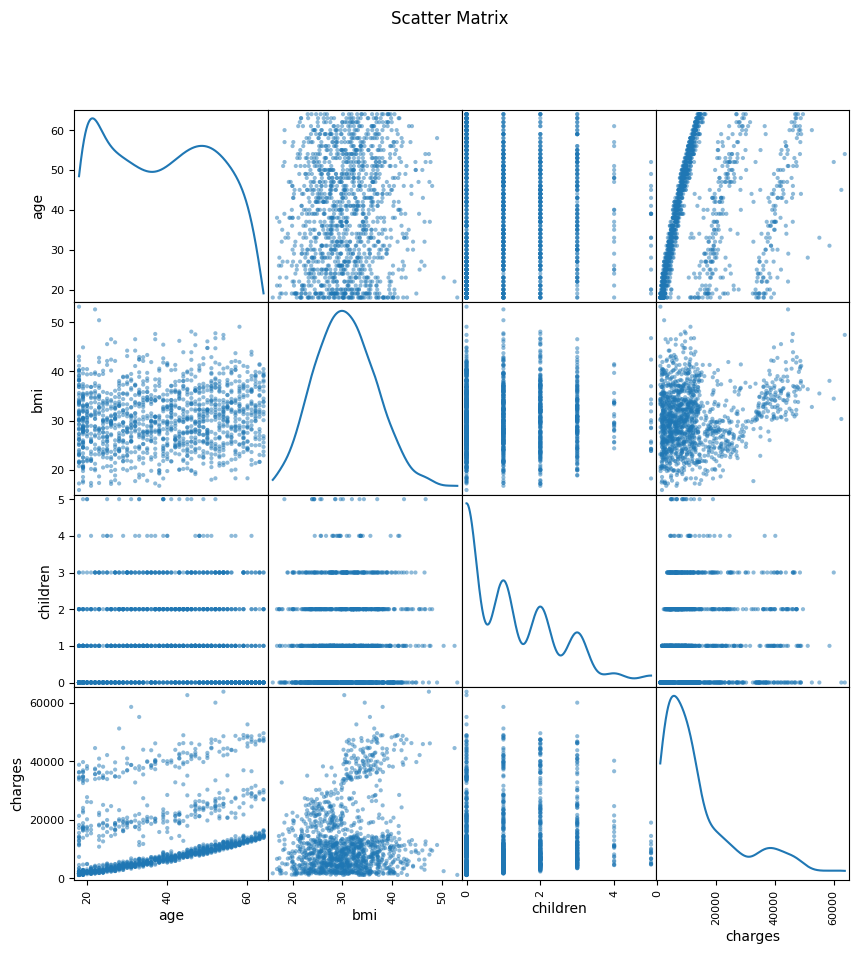

In [ ]:
# Bivariate Analysis - Scatter Matrix
from pandas.plotting import scatter_matrix

# Selecting a subset of features for the scatter matrix
scatter_matrix(data[['age', 'bmi', 'children', 'charges']], figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatter Matrix")
plt.show()

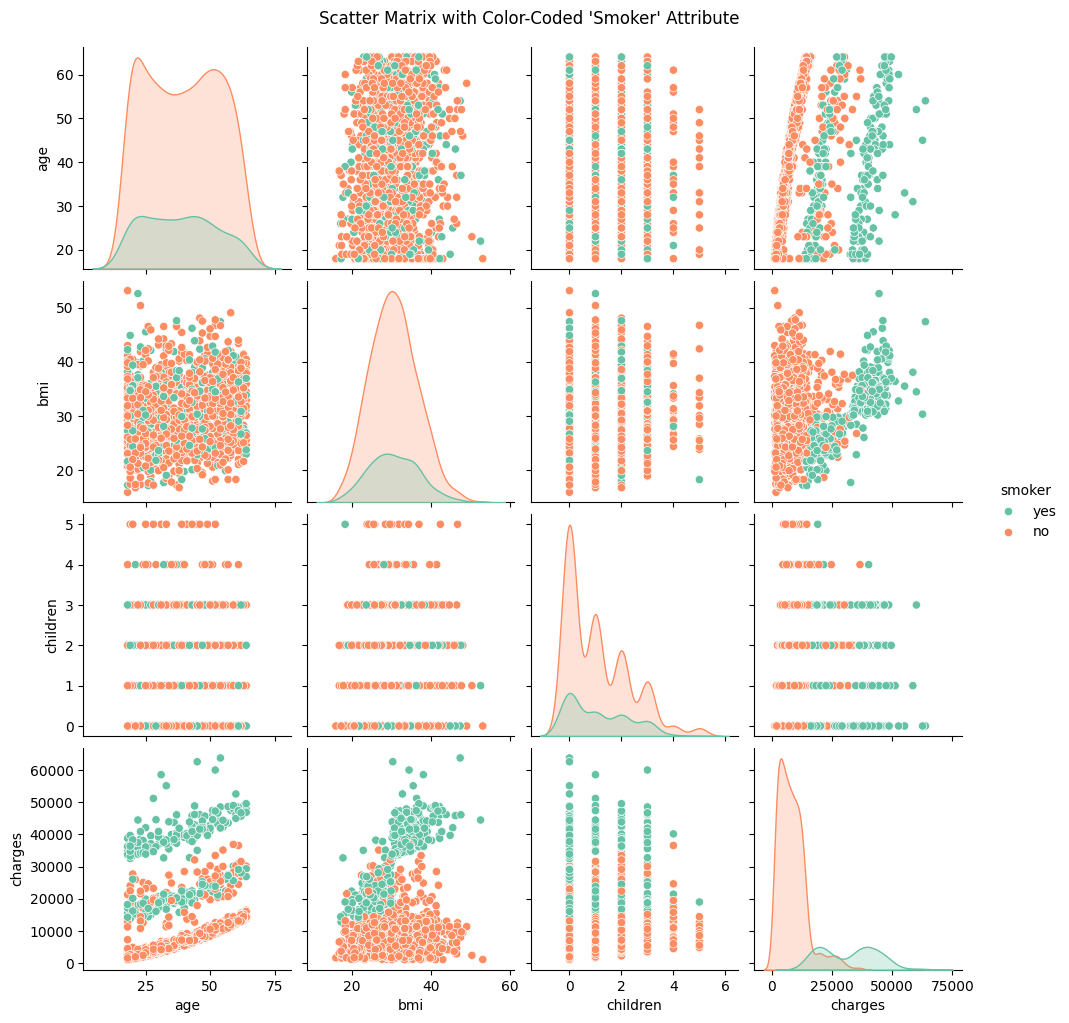

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data, hue='smoker', diag_kind='kde', palette="Set2")
plt.suptitle("Scatter Matrix with Color-Coded 'Smoker' Attribute", y=1.02)
plt.show()


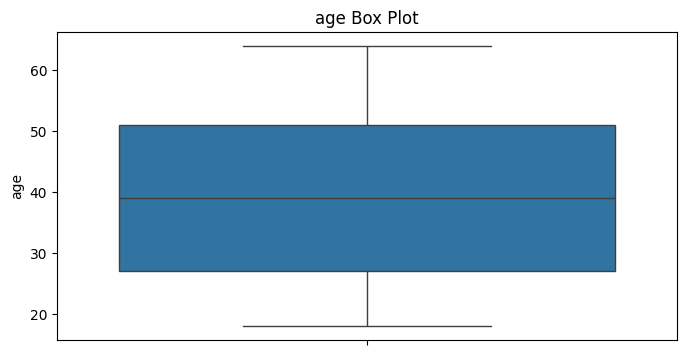

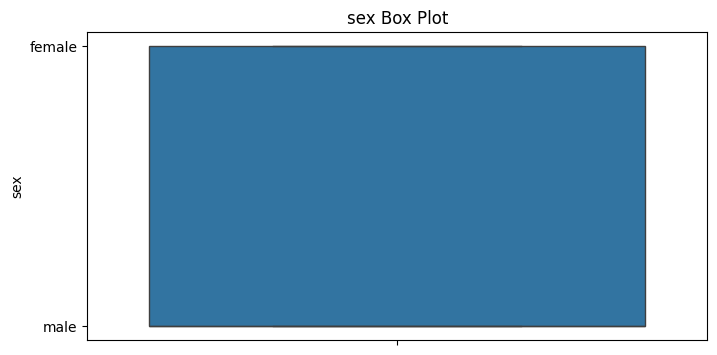

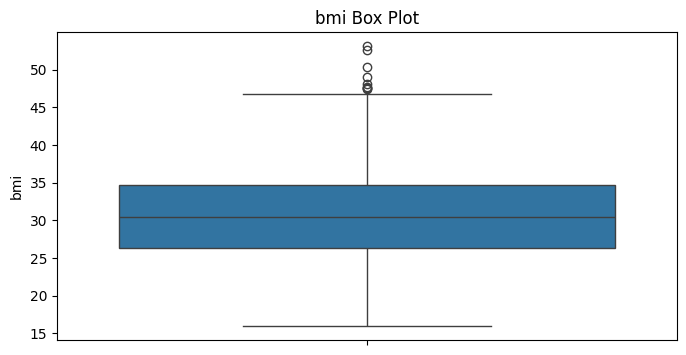

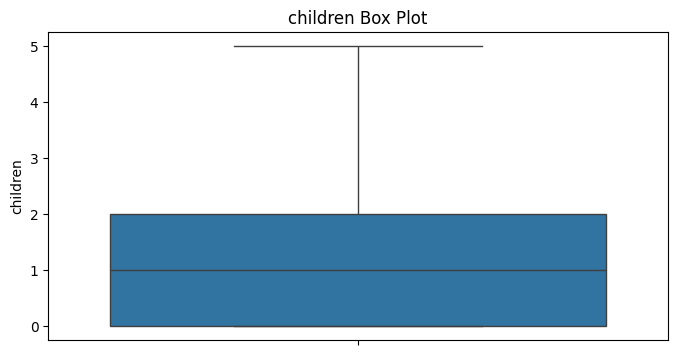

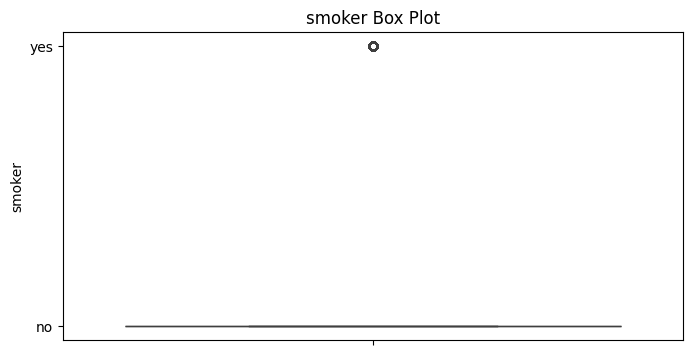

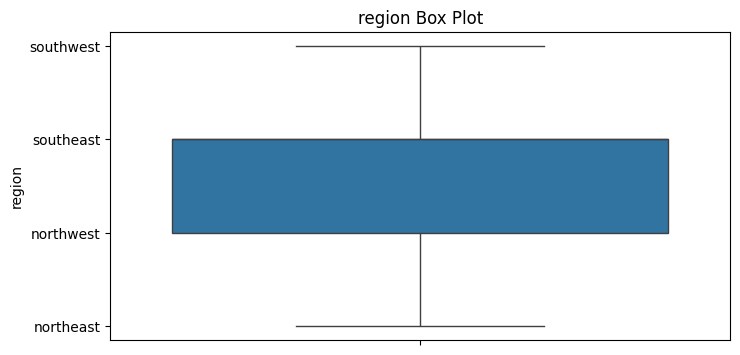

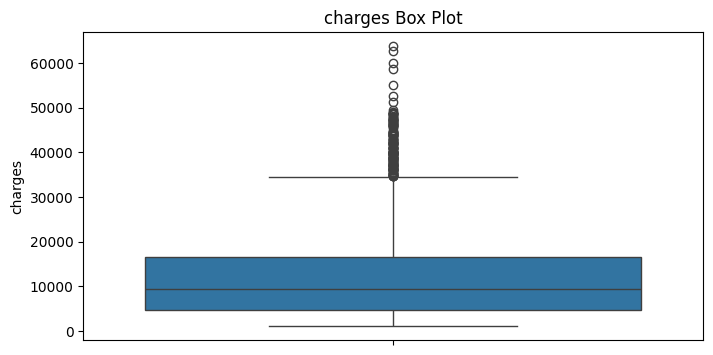

In [ ]:




for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column])
    plt.title(f'{column} Box Plot')
    plt.show()

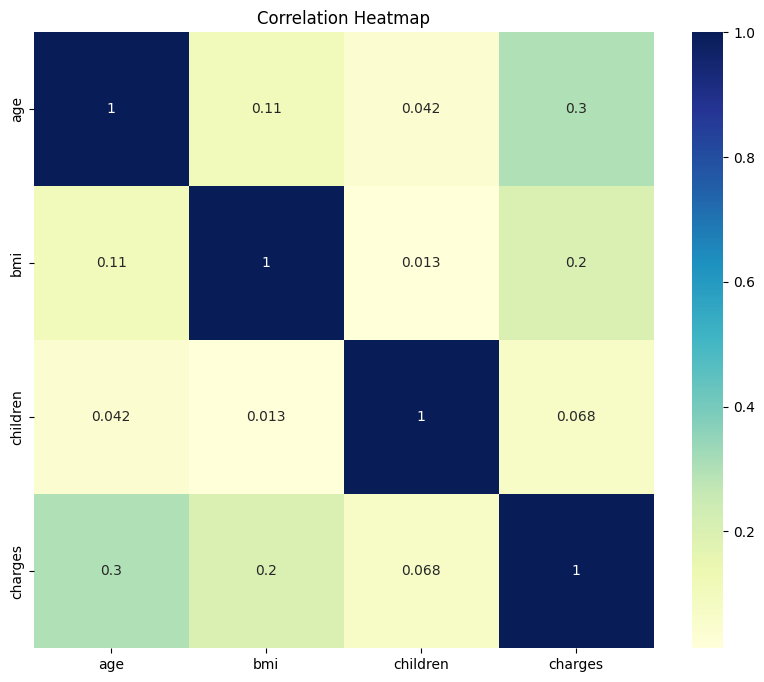

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
data_reduced = data.drop(columns=['sex', 'children', 'region'])

data_reduced.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


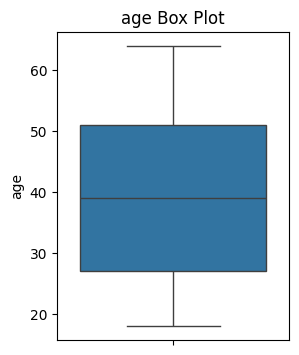

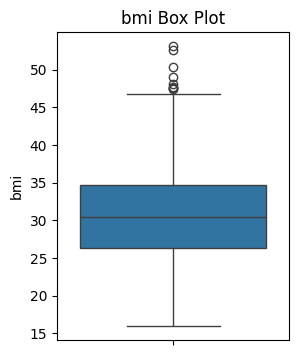

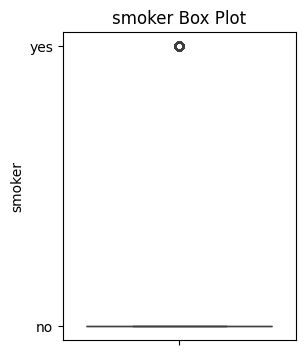

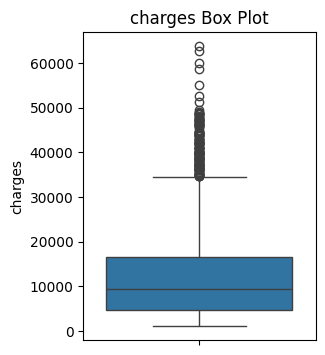

In [ ]:
for column in data_reduced.columns:
    plt.figure(figsize=(3, 4))
    sns.boxplot(data_reduced[column])
    plt.title(f'{column} Box Plot')
    plt.show()

In [ ]:
def identify_outliers(df):
    outlier_count = {}
    for column in df.select_dtypes(include=['float64', 'int64']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]

    return outlier_count

In [ ]:
outliers_info = identify_outliers(data_reduced)

In [ ]:
print(outliers_info)

{'age': 0, 'bmi': 9, 'charges': 139}


In [ ]:
# Create a copy of the original DataFrame to retain the original data
data_cleaned = data_reduced.copy()

# Define a function to remove outliers
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Update the DataFrame to only include non-outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Remove outliers from both bmi and charges
data_cleaned = remove_outliers(data_cleaned, ['bmi', 'charges'])

# Verify the shape of the dataset after removing outliers
print(f"Shape of dataset after removing outliers: {data_cleaned.shape}")

# Check for remaining outliers
outliers_info2 = identify_outliers(data_cleaned)
print(outliers_info2)

Shape of dataset after removing outliers: (1191, 4)
{'age': 0, 'bmi': 7, 'charges': 53}


In [ ]:
data_cleaned.describe()

,age,bmi,charges
count,1191.000000,1191.000000,1191.000000
mean,39.010915,29.993648,9901.104142
std,14.056634,5.870584,7187.379901
min,18.000000,15.960000,1121.873900
25%,26.000000,25.800000,4408.695900
50%,39.000000,29.700000,8347.164300
75%,51.000000,33.770000,12953.594600
max,64.000000,46.750000,34303.167200


In [ ]:
data_cleaned.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Define the features and target variable
X = data_reduced.drop('charges', axis=1)  # Features
y = data_reduced['charges']                 # Target variable

# Categorical and numerical features
categorical_features = ['smoker']
numerical_features = ['age', 'bmi']

# Create a column transformer to handle both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)


In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"rmse : {rmse}")

Mean Squared Error: 34512843.8802279
R² Score: 0.7776932310583374
rmse : 5874.763304187489


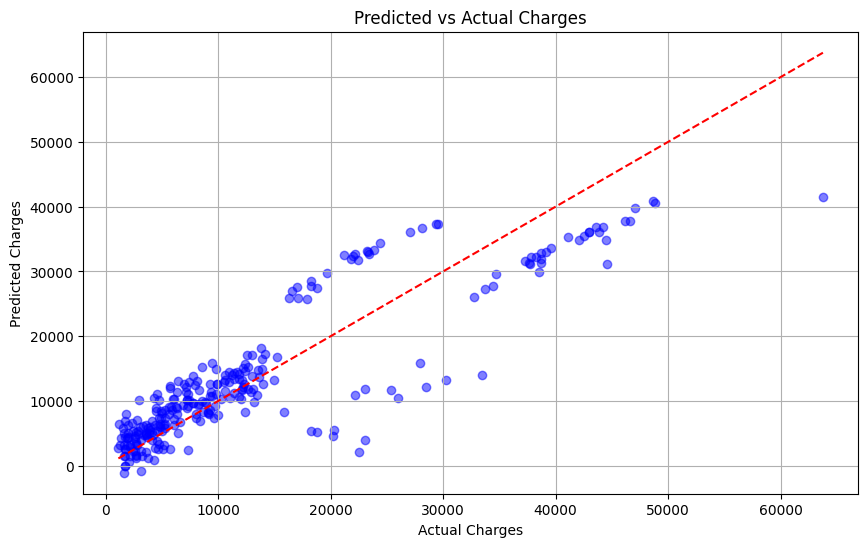

In [ ]:
import matplotlib.pyplot as plt

# Predicting charges on the test dataset
y_pred = model_pipeline.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [ ]:
# Define the features and target variable
X2 = data_cleaned.drop('charges', axis=1)  # Features
y2 = data_cleaned['charges']                 # Target variable

# Categorical and numerical features
categorical_features2 = ['smoker']
numerical_features2 = ['age', 'bmi']

# Create a column transformer to handle both numerical and categorical features
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features2),
        ('cat', OneHotEncoder(), categorical_features2)
    ]
)

model_pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('model', LinearRegression())
])

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Fit the model
model_pipeline2.fit(X_train2, y_train2)

# Predict and evaluate the model
y_pred2 = model_pipeline2.predict(X_test2)

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test2, y_pred2)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"rmse : {rmse}")


# Predicting charges on the test dataset
y_pred = model_pipeline2.predict(X_test2)



Mean Squared Error: 34512843.8802279
R² Score: 0.7776932310583374
rmse : 5874.763304187489


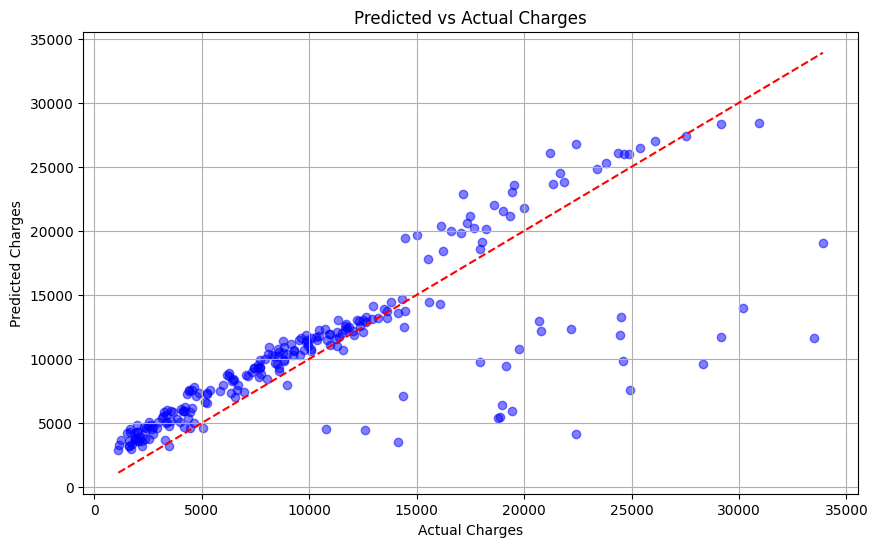

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred2, color='blue', alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [ ]:
data_cleaned.describe()

,age,bmi,charges
count,1191.000000,1191.000000,1191.000000
mean,39.010915,29.993648,9901.104142
std,14.056634,5.870584,7187.379901
min,18.000000,15.960000,1121.873900
25%,26.000000,25.800000,4408.695900
50%,39.000000,29.700000,8347.164300
75%,51.000000,33.770000,12953.594600
max,64.000000,46.750000,34303.167200
